In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./무신사_리뷰merge_전처리완료240122.csv', index_col=0)
df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,상의,셔츠/블라우스,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,상의,니트/스웨터,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,상의,후드 티셔츠,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,상의,후드 티셔츠,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
4,상의,긴소매 티셔츠,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,2561,43000.0,0,28.0,4.8,34,100.0,0.964286,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,아우터,숏패딩/숏헤비 아우터,다운 숏 푸퍼-블랙,P22FWOT001,0,0,2,0.0,"('19~23세', 0)",2900.0,771,139000.0,43,5.0,4.9,17,50.0,0.964286,2,0
4927,아우터,스포츠/용품,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500,3,0
4928,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190,5,0
4929,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095,4,0


### major_category, middle_category 변경

In [ ]:
# 잘못 들어간 스포츠/용품을 바꾸기
df.loc[df.middle_category == '하의', 'major_category'] = '바지'
df.loc[df.middle_category == '하의','middle_category'] = '스포츠/용품'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # LabelEncoder 함수를 불러오고 변수로 지정
le.fit(df['major_category']) # LabelEncoder를 fit를 통하여 교육
le.classes_ # le가 가져온 컬럼 데이터를 중복 없이 확인

array(['바지', '상의', '아우터'], dtype=object)

In [ ]:
le.transform(df['major_category'])
# le.transform을 통하여 데이터프레임 컬럼의 문자를 숫자로 변환

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
df['major_category'] = le.transform(df['major_category'])
df['major_category'].unique(), len(df['major_category'].unique())

(array([1, 0, 2]), 3)

In [ ]:
le.fit(df['middle_category'])
le.transform(df['middle_category'])
df['middle_category'] = le.transform(df['middle_category'])
df['middle_category'].unique(), len(df['middle_category'].unique())

(array([19,  8, 38,  6, 35,  4, 12, 25, 15, 14,  3,  9, 20, 32, 29, 22, 27,
        34, 21, 33, 18, 17, 37,  7, 28,  5,  0,  2, 11, 26, 31, 24,  1, 10,
        23, 13, 36, 16, 30]),
 39)

In [ ]:
df_copy = df.copy()

### 상관관계 재확인

In [ ]:
df_copy.columns

Index(['major_category', 'middle_category', 'name', 'number', 'limit',
       'exclusive', 'target_gender', 'buy_gender', 'buy_age', 'view', 'like',
       'price', 'discount_rate', 'delivery_date', 'rating', 'review', 'buy',
       'score', 'buy_age1', 'buy_age2'],
      dtype='object')

In [ ]:
df_copy = df_copy[['major_category', 'middle_category', 'limit', 'exclusive', 'target_gender',
        'buy_age1', 'view', 'like', 'price', 'discount_rate', 'delivery_date', 'rating', 'score',
        'review', 'buy']]

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


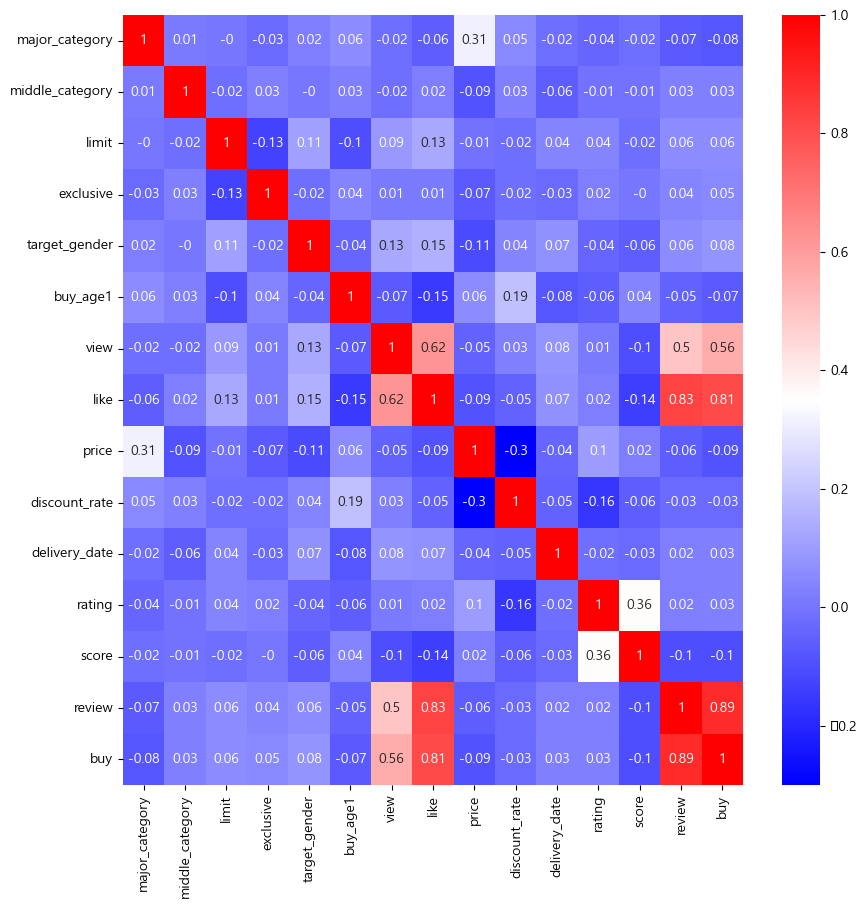

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
from matplotlib import font_manager, rc
import numpy as np

path = 'c:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unlown system...sorry..')

plt.figure(figsize=(10, 10))
correlation_matrix = df_copy.corr(numeric_only=True).round(2)
sns.heatmap(data = correlation_matrix, annot=True, cmap='bwr')

## 연속형 데이터만 머신러닝

### StandardScaler(표준화) 적용 후 데이터 나누기

In [ ]:
X = df_copy.drop('buy', axis=1)
y = df_copy['buy']

X.shape, y.shape

((4931, 14), (4931,))

In [ ]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

X_ss = SS.fit_transform(X)
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

### Ridge, Lasso
- https://velog.io/@rlwjddl234/%EB%8B%A4%EC%A4%91-%ED%9A%8C%EA%B7%80 참고
- 규제(regularization)는 머신러닝 모델이 훈련 셋을 너무 과도하게 학습하지 못하도록 훼방을 놓는 것을 말한다.
- 즉 모델이 훈련 셋에 과대적합되지 않도록 만드는 것이다. 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것이다.
- 이 규제를 적용한 회귀 모델이 Ridge, Lasso

### Ridge 모델 적용
- 참고
- https://signature95.tistory.com/46
- https://velog.io/@jochedda/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%A6%BF%EC%A7%80-%ED%9A%8C%EA%B7%80-Ridge-Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] }
# alpha값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
# alpha값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.
gridsearch = GridSearchCV(ridge, param_grid = params)
# 적절한 알파값을 찾기 위해 그리드 서치를 사용
gridsearch.fit(X_train, y_train)

r_ridge_estimator = gridsearch.best_estimator_
r_y_train_pred = r_ridge_estimator.predict(X_train)
r_y_test_pred = r_ridge_estimator.predict(X_test)

print(r_ridge_estimator)

Ridge(alpha=100)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_mae = mean_absolute_error(y_train, r_y_train_pred)
train_mse = mean_squared_error(y_train, r_y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, r_y_train_pred))
train_rsquared = r2_score(y_train, r_y_train_pred)

test_mae = mean_absolute_error(y_test, r_y_test_pred)
test_mse = mean_squared_error(y_test, r_y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, r_y_test_pred))
test_rsquared = r2_score(y_test, r_y_test_pred)

print('train')
print('MAE :', train_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', train_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', train_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', train_rsquared)
print('='*50)
print('test')
print('MAE :', test_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', test_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', test_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', test_rsquared)

train
MAE : 586.3048572932903
MSE : 7790824.694546801
RMSE : 2791.204882223231
R-Squared : 0.8184302623890649
test
MAE : 551.2054107933055
MSE : 3081793.156028585
RMSE : 1755.5036758801118
R-Squared : 0.81927187722393


### Lasso 모델 적용

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] }
# alpha값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
# alpha값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.
gridsearch = GridSearchCV(lasso, param_grid = params)
# 적절한 알파값을 찾기 위해 그리드 서치를 사용
gridsearch.fit(X_train, y_train)

lasso_estimator = gridsearch.best_estimator_
l_y_train_pred = lasso_estimator.predict(X_train)
l_y_test_pred = lasso_estimator.predict(X_test)


print(lasso_estimator)

Lasso(alpha=100)


In [ ]:
train_mae = mean_absolute_error(y_train, l_y_train_pred)
train_mse = mean_squared_error(y_train, l_y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, l_y_train_pred))
train_rsquared = r2_score(y_train, l_y_train_pred)

test_mae = mean_absolute_error(y_test, l_y_test_pred)
test_mse = mean_squared_error(y_test, l_y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, l_y_test_pred))
test_rsquared = r2_score(y_test, l_y_test_pred)

print('train')
print('MAE :', train_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', train_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', train_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', train_rsquared)
print('='*50)
print('test')
print('MAE :', test_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', test_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', test_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', test_rsquared)

train
MAE : 532.8616913309409
MSE : 7821468.046719802
RMSE : 2796.6887647215594
R-Squared : 0.8177161010991226
test
MAE : 499.3323977662091
MSE : 2987673.5667927642
RMSE : 1728.4888101439258
R-Squared : 0.8247914094630648


### KFold 및 LGBM 모델 적용

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=13)

results = []

for fold, (train_idx, validation_idx) in enumerate(kfold.split(X)):
    X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    lgbm = LGBMRegressor(verbose=-1, n_estimators = 400)
    lgbm.fit(X_train, y_train)

    lgbm_y_pred = lgbm.predict(X_validation)

    mae = mean_absolute_error(y_validation, lgbm_y_pred)
    mse = mean_squared_error(y_validation, lgbm_y_pred)
    rmse = np.sqrt(mean_squared_error(y_validation, lgbm_y_pred))
    rsquared = r2_score(y_validation, lgbm_y_pred)

    fold_result = {
        'Fold': fold + 1,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': rsquared
    }

    results.append(fold_result)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
results_df

,Fold,MAE,MSE,RMSE,R-Squared
0,1,355.415496,5.208743e+06,2282.267104,0.694539
1,2,595.005693,1.031337e+07,3211.443598,0.754000
2,3,422.599678,1.447898e+07,3805.124866,0.743518
3,4,401.377585,2.617544e+06,1617.882690,0.858828
4,5,642.708734,1.353471e+07,3678.954801,0.752130


In [ ]:
# 학습용 데이터의 전체 폴드 평균 계산
average_result = results_df[['MAE', 'MSE', 'RMSE', 'R-Squared']].mean()
average_result

MAE          4.834214e+02
MSE          9.230668e+06
RMSE         2.919135e+03
R-Squared    7.606029e-01
dtype: float64

In [ ]:
lgbm_y_pred_test = lgbm.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_y_pred_test)
mse = mean_squared_error(y_test, lgbm_y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, lgbm_y_pred_test))
rsquared = r2_score(y_test, lgbm_y_pred_test)

print('MAE :', mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', rsquared)

MAE : 1480.3045687439064
MSE : 16930996.972155496
RMSE : 4114.729270821532
R-Squared : 0.0071016630304291395


### KFold 및 XGBRegressor 모델 적용

In [ ]:
from xgboost import XGBRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=13)

results = []

for fold, (train_idx, validation_idx) in enumerate(kfold.split(X)):
    X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    xgb_regerssor = XGBRegressor(n_estimators = 400)
    xgb_regerssor.fit(X_train, y_train)

    xgb_y_pred = xgb_regerssor.predict(X_validation)

    mae = mean_absolute_error(y_validation, xgb_y_pred)
    mse = mean_squared_error(y_validation, xgb_y_pred)
    rmse = np.sqrt(mean_squared_error(y_validation, xgb_y_pred))
    rsquared = r2_score(y_validation, xgb_y_pred)

    fold_result = {
        'Fold': fold + 1,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': rsquared
    }

    results.append(fold_result)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
results_df

,Fold,MAE,MSE,RMSE,R-Squared
0,1,424.115129,1.616819e+07,4020.968884,0.051836
1,2,480.471000,6.638812e+06,2576.589277,0.841647
2,3,439.168617,1.998658e+07,4470.635780,0.645956
3,4,311.786086,2.144593e+06,1464.442728,0.884335
4,5,529.789065,1.268948e+07,3562.229663,0.767609


In [ ]:
# 학습용 데이터의 전체 폴드 평균 계산
average_result = results_df[['MAE', 'MSE', 'RMSE', 'R-Squared']].mean()
average_result

MAE          4.370660e+02
MSE          1.152553e+07
RMSE         3.218973e+03
R-Squared    6.382766e-01
dtype: float64

In [ ]:
xgb_y_pred_test = xgb_regerssor.predict(X_test)

mae = mean_absolute_error(y_test, xgb_y_pred_test)
mse = mean_squared_error(y_test, xgb_y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred_test))
rsquared = r2_score(y_test, xgb_y_pred_test)

print('MAE :', mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', rsquared)

MAE : 1038.472182943466
MSE : 18133874.001767613
RMSE : 4258.388662600869
R-Squared : -0.06343964084228149


## EDA에서 상관관계를 가졌던 연속형 데이터만 추출

In [ ]:
df_copy_corr = df_copy[['view', 'like', 'review', 'buy']]
df_copy_corr

,view,like,review,buy
0,1200.0,493,36,50.0
1,4900.0,650,61,200.0
2,3600.0,2536,41,150.0
3,1000.0,569,62,150.0
4,11000.0,2561,34,100.0
...,...,...,...,...
4926,2900.0,771,17,50.0
4927,2100.0,1275,222,300.0
4928,1400.0,198,33,100.0
4929,3300.0,2028,87,100.0


### StandardScaler(표준화) 적용 후 데이터 나누기

In [ ]:
X = df_copy_corr.drop('buy', axis=1)
y = df_copy_corr['buy']

X.shape, y.shape

((4931, 3), (4931,))

In [ ]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

X_ss = SS.fit_transform(X)
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

### Ridge 모델 적용

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] }
gridsearch = GridSearchCV(ridge, param_grid = params)
# 적절한 알파값을 찾기 위해 그리드 서치를 사용
gridsearch.fit(X_train, y_train)

r_ridge_estimator = gridsearch.best_estimator_
r_y_train_pred = r_ridge_estimator.predict(X_train)
r_y_test_pred = r_ridge_estimator.predict(X_test)

print(gridsearch.best_estimator_)

Ridge(alpha=100)


In [ ]:
train_mae = mean_absolute_error(y_train, r_y_train_pred)
train_mse = mean_squared_error(y_train, r_y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, r_y_train_pred))
train_rsquared = r2_score(y_train, r_y_train_pred)

test_mae = mean_absolute_error(y_test, r_y_test_pred)
test_mse = mean_squared_error(y_test, r_y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, r_y_test_pred))
test_rsquared = r2_score(y_test, r_y_test_pred)

print('train')
print('MAE :', train_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', train_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', train_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', train_rsquared)
print('='*50)
print('test')
print('MAE :', test_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', test_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', test_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', test_rsquared)

train
MAE : 533.7925999537798
MSE : 7844584.865188178
RMSE : 2800.8186062628506
R-Squared : 0.8171773500903057
test
MAE : 498.20317805229104
MSE : 3059689.1776001677
RMSE : 1749.1967235277361
R-Squared : 0.8205681389537077


### Lasso 모델 적용

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] }
gridsearch = GridSearchCV(lasso, param_grid = params)
# 적절한 알파값을 찾기 위해 그리드 서치를 사용
gridsearch.fit(X_train, y_train)

lasso_estimator = gridsearch.best_estimator_
l_y_train_pred = lasso_estimator.predict(X_train)
l_y_test_pred = lasso_estimator.predict(X_test)


print(gridsearch.best_estimator_)

Lasso(alpha=100)


In [ ]:
train_mae = mean_absolute_error(y_train, l_y_train_pred)
train_mse = mean_squared_error(y_train, l_y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, l_y_train_pred))
train_rsquared = r2_score(y_train, l_y_train_pred)

test_mae = mean_absolute_error(y_test, l_y_test_pred)
test_mse = mean_squared_error(y_test, l_y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, l_y_test_pred))
test_rsquared = r2_score(y_test, l_y_test_pred)

print('train')
print('MAE :', train_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', train_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', train_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', train_rsquared)
print('='*50)
print('test')
print('MAE :', test_mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', test_mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', test_rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', test_rsquared)

train
MAE : 536.900185974457
MSE : 7837098.655672089
RMSE : 2799.4818548567323
R-Squared : 0.8173518205925734
test
MAE : 501.0305647601585
MSE : 3006996.8121060515
RMSE : 1734.0694369332653
R-Squared : 0.8236582205452492


### KFold 및 LGBMRegressor 모델 적용

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=13)

results = []

for fold, (train_idx, validation_idx) in enumerate(kfold.split(X)):
    X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    lgbm = LGBMRegressor(verbose=-1, n_estimators = 400)
    lgbm.fit(X_train, y_train)

    lgbm_y_pred = lgbm.predict(X_validation)

    mae = mean_absolute_error(y_validation, lgbm_y_pred)
    mse = mean_squared_error(y_validation, lgbm_y_pred)
    rmse = np.sqrt(mean_squared_error(y_validation, lgbm_y_pred))
    rsquared = r2_score(y_validation, lgbm_y_pred)

    fold_result = {
        'Fold': fold + 1,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': rsquared
    }

    results.append(fold_result)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
results_df

,Fold,MAE,MSE,RMSE,R-Squared
0,1,437.095074,7.259264e+06,2694.302087,0.574289
1,2,648.453995,1.071982e+07,3274.114254,0.744305
2,3,475.611087,1.405447e+07,3748.929210,0.751038
3,4,435.553309,4.251128e+06,2061.826447,0.770723
4,5,679.305188,1.644944e+07,4055.790813,0.698750


In [ ]:
# 학습용 데이터의 전체 폴드 평균 계산
average_result = results_df[['MAE', 'MSE', 'RMSE', 'R-Squared']].mean()
average_result

MAE          5.352037e+02
MSE          1.054683e+07
RMSE         3.166993e+03
R-Squared    7.078210e-01
dtype: float64

### LGBM TEST 데이터 적용

In [ ]:
lgbm_y_pred_test = lgbm.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_y_pred_test)
mse = mean_squared_error(y_test, lgbm_y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, lgbm_y_pred_test))
rsquared = r2_score(y_test, lgbm_y_pred_test)

print('MAE :', mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', rsquared)

MAE : 1033.3872874075669
MSE : 18119689.734200485
RMSE : 4256.7228867052745
R-Squared : -0.06260782120982333


### KFold 및 XGBRegressor 모델 적용

In [ ]:
from xgboost import XGBRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=13)

results = []

for fold, (train_idx, validation_idx) in enumerate(kfold.split(X)):
    X_train, X_validation = X.iloc[train_idx], X.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    xgb_regerssor = XGBRegressor(n_estimators = 400)
    xgb_regerssor.fit(X_train, y_train)

    xgb_y_pred = xgb_regerssor.predict(X_validation)

    mae = mean_absolute_error(y_validation, xgb_y_pred)
    mse = mean_squared_error(y_validation, xgb_y_pred)
    rmse = np.sqrt(mean_squared_error(y_validation, xgb_y_pred))
    rsquared = r2_score(y_validation, xgb_y_pred)

    fold_result = {
        'Fold': fold + 1,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': rsquared
    }

    results.append(fold_result)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
results_df

,Fold,MAE,MSE,RMSE,R-Squared
0,1,394.003078,4.455119e+06,2110.715271,0.738735
1,2,729.265896,3.465828e+07,5887.128172,0.173311
2,3,522.381775,2.507026e+07,5007.021186,0.555903
3,4,375.092380,5.322867e+06,2307.133958,0.712921
4,5,597.148012,1.157306e+07,3401.919576,0.788055


In [ ]:
# 학습용 데이터의 전체 폴드 평균 계산
average_result = results_df[['MAE', 'MSE', 'RMSE', 'R-Squared']].mean()
average_result

MAE          5.235782e+02
MSE          1.621592e+07
RMSE         3.742784e+03
R-Squared    5.937850e-01
dtype: float64

### XGBRegressor TEST 데이터 적용

In [ ]:
xgb_y_pred_test = xgb_regerssor.predict(X_test)

mae = mean_absolute_error(y_test, xgb_y_pred_test)
mse = mean_squared_error(y_test, xgb_y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred_test))
rsquared = r2_score(y_test, xgb_y_pred_test)

print('MAE :', mae) # 모델의 예측값과 실제값 차이(Error) 를 절대값으로 변환하여 평균한 것
print('MSE :', mse) # 모델의 예측값과 실제값 차이(Error)를 제곱한 뒤 평균을 구한 것
print('RMSE :', rmse) # MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.
# 세가지 모두 값이 작을 수록 좋은 모델
print('R-Squared :', rsquared)

MAE : 1032.6570074666959
MSE : 18117742.208648812
RMSE : 4256.4941217683845
R-Squared : -0.06249361087214256


In [ ]:
# import matplotlib.pyplot as plt

# train_score = []
# test_score = []
# alpha_list =[10, 100, 1000, 10000, 100000, 1000000]
# for alpha in alpha_list:
#     # 릿지 모델을 만듭니다
#     ridge = Ridge(alpha=alpha)
#     # 릿지 모델을 훈련합니다
#     ridge.fit(train_scaled,  y_train)
#     # 훈련 점수와 테스트 점수를 저장합니다
#     train_score.append(ridge.score(train_scaled, y_train))
#     test_score.append(ridge.score(test_scaled, y_test))
# plt.plot(np.log10(alpha_list), train_score)
# plt.plot(np.log10(alpha_list), test_score)
# plt.xlabel('alpha')
# plt.ylabel('R^2')
# plt.show()

<Axes: >

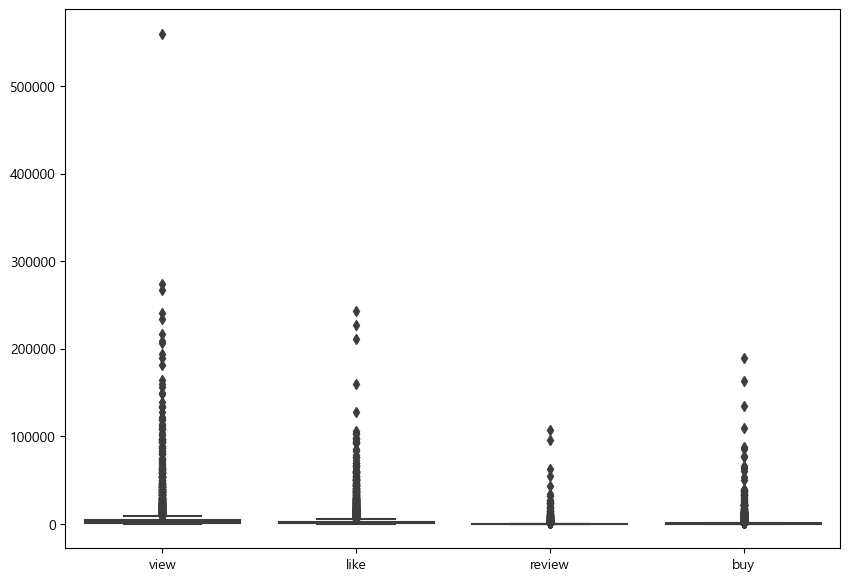

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_copy_corr[['view', 'like', 'review', 'buy']])

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df_copy_corr['view'].values, 25)
    quantile_75 = np.percentile(df_copy_corr['view'].values, 75)
    # .values : numpy array로 변경하기 위해 사용
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = df_copy_corr[df_copy_corr['view'] > highest_val].index

    return outlier_index

In [ ]:
df_copy_corr.columns

Index(['view', 'like', 'review', 'buy'], dtype='object')

In [ ]:
len(get_outlier(df=df_copy_corr, column='buy', weight=1.5))

572